# Problem 1
A micrometeorologist is making measurements of surface energy fluxes using the Eddy Correlation method applied above an area of short grass with an albedo of 23% growing in a wet clay soil with 40% porosity. During one particular hour her instruments provide the measurements of the vertical wind speed, w, air temperature, T, and specific humidity, q, every minute given in the table below. See Chapter 7 of Terrestrial Hydrometeorology, and note that fluctuations in the variables are the difference between the current value (at each second in this case) and the time average value over the hour. 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utilities as util

In [63]:
#Given data
albedo = 0.23
porosity = 0.40

#import data from problem statement
obs_data_fn = r"C:\Users\adunw\OneDrive - Colostate\Fort Collins\Courses\Spring 2024\CIVE 625\Homework\HW_2\Problem 1 Data.xlsx"
obs_data = pd.read_excel(obs_data_fn)
# Delete second row that contains units
obs_data = obs_data.drop(0)


# Problem 1a
(a)	Plot the minute-by-minute values of w' in m s-1, Tv' in deg C and q’ in kg kg-1 calculated by the micrometeorologist from these data. (30 points)

In [64]:
def calc_virtual_temp(temp, specific_humidity):
    """
    Calculate virtual temperature
    :param temp: temperature in C
    :param specific_humidity: specific humidity in g/kg
    :return: virtual temperature in C
    """

    # Calculate virtual temperature
    virtual_temp = temp * (1 + (0.61 * specific_humidity))
    return virtual_temp

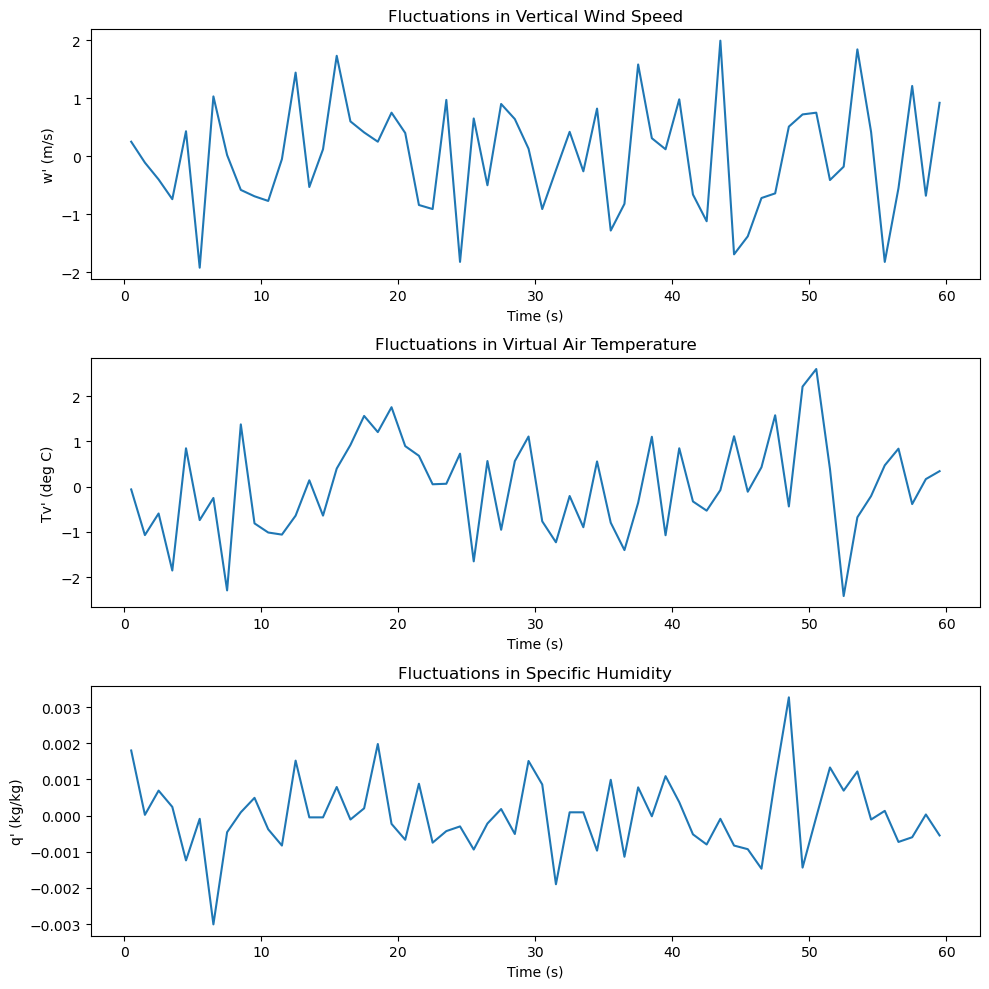

In [65]:
#(a) Plot the minute-by-minute values of w' in m s-1, Tv' in deg C, and q' in kg kg-1 calculated by the micrometeorologist from these data. 
# Obs_data_fn has time, s, vertical wind speed, w, air temperature, T, and specific humidity, q
#fluctuations in the variables = current value (at each second in this case) - time average value over the hour

obs_data['T_v'] = calc_virtual_temp(obs_data['T'], obs_data['q'])

#Calculate the time average values of w, T, and q
w_bar = obs_data['w'].mean()
Tv_bar = obs_data['T_v'].mean()
q_bar = obs_data['q'].mean()
#Create new columns for the fluctuations in w, T, and q
obs_data['w_prime'] = obs_data['w'] - w_bar
obs_data['Tv_prime'] = obs_data['T_v'] - Tv_bar
obs_data['q_prime'] = obs_data['q'] - q_bar

#Plot the minute-by-minute values of w' in m s-1, Tv' in deg C, and q' in kg kg-1
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(obs_data['Time'], obs_data['w_prime'])
ax[0].set_ylabel("w' (m/s)")
ax[0].set_xlabel("Time (s)")
ax[0].set_title("Fluctuations in Vertical Wind Speed")
ax[1].plot(obs_data['Time'], obs_data['Tv_prime'])
ax[1].set_ylabel("Tv' (deg C)")
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Fluctuations in Virtual Air Temperature")
ax[2].plot(obs_data['Time'], obs_data['q_prime'])
ax[2].set_ylabel("q' (kg/kg)")
ax[2].set_xlabel("Time (s)")
ax[2].set_title("Fluctuations in Specific Humidity")
plt.tight_layout()
plt.show()


# Problem 1b

(b)	Plot the minute-by-minute values of the product (w'Tv') in m s-1 (deg C) and (w'q') in m s-1 kg kg-1 calculated by the micrometeorologist from these data. (20 points)

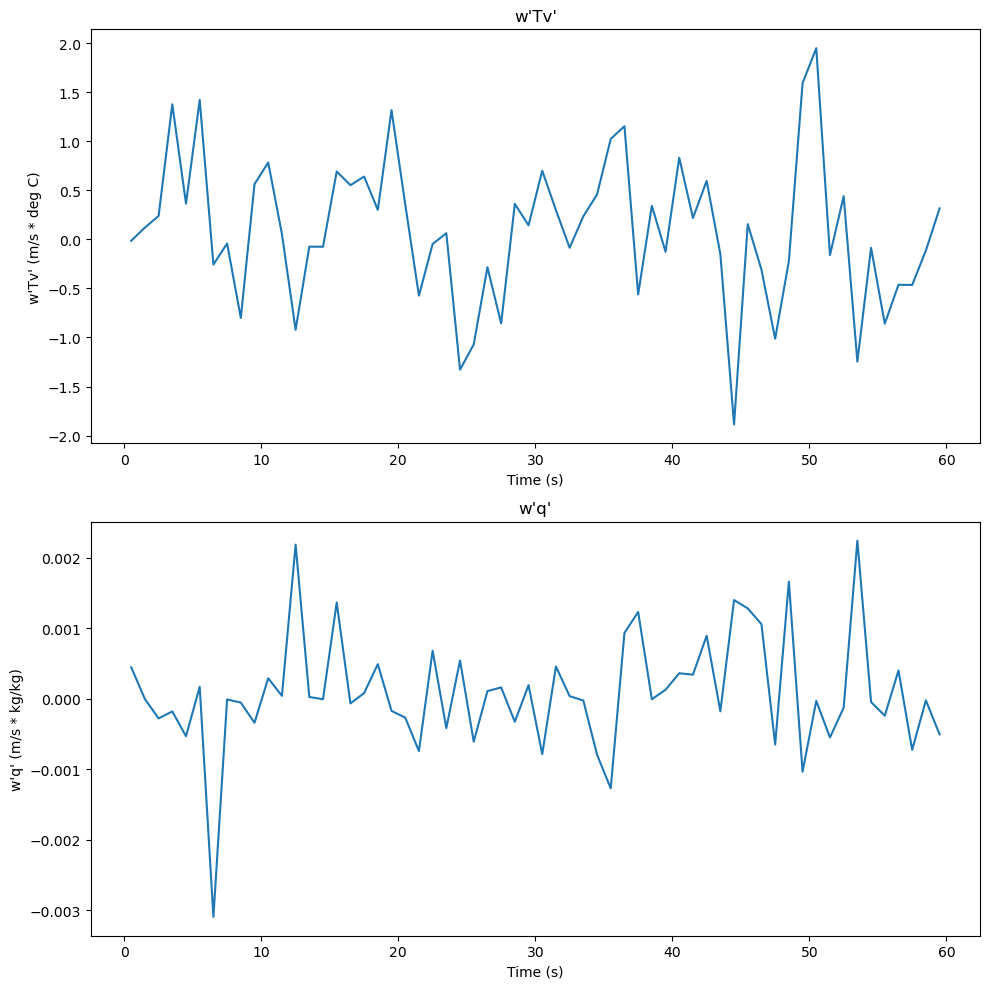

In [66]:
obs_data['w_prime x Tv_prime'] = obs_data['w_prime'] * obs_data['Tv_prime']
obs_data['w_prime x q_prime'] = obs_data['w_prime'] * obs_data['q_prime']

#Plot the minute-by-minute values of w' in m s-1, Tv' in deg C, and q' in kg kg-1
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(obs_data['Time'], obs_data['w_prime x Tv_prime'])
ax[0].set_ylabel("w'Tv' (m/s * deg C)")
ax[0].set_xlabel("Time (s)")
ax[0].set_title("w'Tv'")
ax[1].plot(obs_data['Time'], obs_data['w_prime x q_prime'])
ax[1].set_ylabel("w'q' (m/s * kg/kg)")
ax[1].set_xlabel("Time (s)")
ax[1].set_title("w'q'")
plt.tight_layout()
plt.show()


# Problem 1c
(c)	Assuming the density of air rho_a = 1.28 kg m-3, the latent heat of vaporization of water lambda = 2.45 MJ kg-1, and specific heat of air at constant pressure cp = 1.01 kJ kg-1, what are the hourly average values of sensible heat, H, and latent heat flux, E, (both in units of W m-2) that he calculated from these measurements? (20 points)

In [67]:

#Given data
rho_a = 1.28 #kg m-3 density of air 
LH = 2.45 * 10**6 # J kg-1 latent heat of vaporization
c_p = 1.01 * 10**3 # J kg-1 K-1 specific heat of air at constant pressure 

w_prime_Tv_prime_bar = obs_data['w_prime x Tv_prime'].mean()
w_prime_q_prime_bar = obs_data['w_prime x q_prime'].mean()
LH_flux = rho_a * LH * w_prime_q_prime_bar # Eq. 7.7 in TH
SH_flux = rho_a * c_p * w_prime_Tv_prime_bar # Eq. 7.8 in TH
#print in scientific notation with 2 decimal places
print(f"Time Averaged Latent Heat Flux: {LH_flux:.2f} W/m^2")
print(f"Time Averaged Sensible Heat Flux: {SH_flux:.2f} W/m^2")



Time Averaged Latent Heat Flux: 271.69 W/m^2
Time Averaged Sensible Heat Flux: 118.94 W/m^2



# Problem 1d
(d)	What value of sensible heat would he have calculated had he for simplicity assumed the virtual temperature of the air, Tv, was always equal to the air temperature, T? Can you explain this result? (10 points)


In [68]:
obs_data['T_prime'] = obs_data['T'] - obs_data['T'].mean()
obs_data['w_prime x T_prime'] = obs_data['w_prime'] * obs_data['T_prime']

w_prime_T_prime_bar = obs_data['w_prime x T_prime'].mean()
SH_flux_T = rho_a * c_p * w_prime_T_prime_bar # Eq. 7.8 in TH

#print in decimal notation with 2 decimal places
print(f"Time Averaged Sensible Heat Flux: {SH_flux_T:.2f} W/m^2")


Time Averaged Sensible Heat Flux: 114.13 W/m^2


# Why is sensible heat so much lower when calculated using T instead of T<sub>v</sub>?

T<sub>v</sub> accounts for turbulent mixing in the atmosphere. The flucuations of temperature form the mean are only pseudo-random - on average warm ai r will tend to move upwards and cold air will tend to move downwards. If we use T' instead of T<sub>v</sub>' to calcualte sensible heat flux, we would be ignoring this effect and should get a lower value for sensible heat flux. 

# Problem 1e

(e)	Often the ratio of the sum of the sensible heat plus latent heat fluxes measured using the eddy correlation method relative to the available energy is called the "recovery ratio".

During the hour for which sensible and latent heat flux measurements were made using the eddy correlation method, the measured incoming solar radiation near the ground was 685 W m-2, and the measured incoming and outgoing longwave radiation near the ground were 281 W m-2  and 312 W m-2, respectively. The soil heat flux measured at 5 cm depth was 18 W m-2; and the average temperature of the 5 cm layer of soil above the soil heat plate during this hour increased by 0.9 deg C.  Neglecting all other components in the energy balance (e.g., physical energy storage, physical energy storage, advection, etc), what was the recovery ratio that the micrometeorologist found? (10 points)


In [69]:
#Soil heat flux
d = 0.05 # m depth of soil
dT = 0.9 # C temperature difference between soil and air
G_d = 18 # W/m^2 soil heat flux
t = 3600 # s in one hour of measurement
Cs = 3.10 * 10**6 # J m-3 K-1 Heat Capacity of soil from Table 6.1 in TH

S_in = 685 # W/m^2 incoming solar radiation
L_in =  281 # W/m^2 incoming longwave radiation
L_out = 312 # W/m^2 outgoing longwave radiation

#Calculate the net radiation
R_net = S_in * (1 - albedo) + (L_in - L_out) # Equation 5.28 in TH
#Calculate surface soil heat flux from soil heat flux and net radiation
G_surf = G_d + Cs * d * dT / t # Equation 7.1 in TH

print(f"Surface Soil Heat Flux: {G_surf:.2f} W/m^2")

Available_Energy = R_net - G_surf # Equation 4.3 in TH

Recovery_Ratio = (LH_flux + SH_flux) / Available_Energy # From problem statement

print(f"Recovery Ratio: {Recovery_Ratio:.2f}")

Surface Soil Heat Flux: 56.75 W/m^2
Recovery Ratio: 0.89


# Problem 1f

## Explain this recovery ratio:




$$r_{\theta,v,w}$$
